In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
houseData['CentralAir'].describe()

count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object

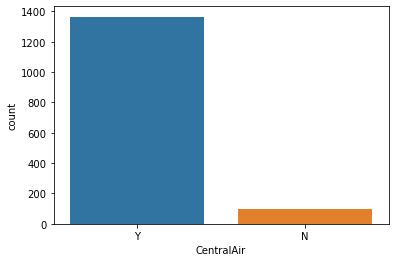

In [4]:
sb.countplot(houseData['CentralAir'])

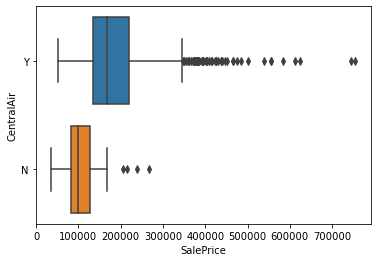

In [5]:
sb.boxplot(y = 'CentralAir' , x = 'SalePrice' , data = houseData)

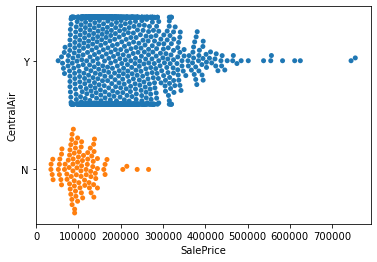

In [6]:
sb.swarmplot(y = 'CentralAir' , x = 'SalePrice' , data = houseData)

In [7]:
houseData_train , houseData_test = train_test_split(houseData , test_size = 1100)
print("Train Set :", houseData_train.shape)
print("Test Set  :", houseData_test.shape)

Train Set : (360, 81)
Test Set  : (1100, 81)


In [8]:
salePriceTrain = pd.DataFrame(houseData_train['SalePrice'])
centralAirTrain = pd.DataFrame(houseData_train['CentralAir'])
salePriceTest = pd.DataFrame(houseData_test['SalePrice'])                          
centralAirTest = pd.DataFrame(houseData_test['CentralAir'])

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(salePriceTrain , centralAirTrain)

DecisionTreeClassifier(max_depth=2)

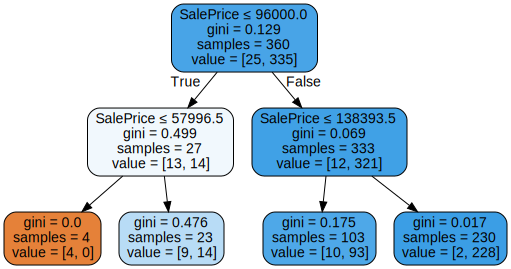

In [9]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = salePriceTrain.columns,       # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.9416666666666667


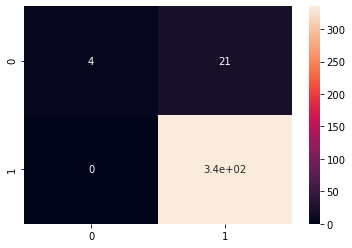

In [10]:
centralAirTrainPredict = dectree.predict(salePriceTrain)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(salePriceTrain, centralAirTrain))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(centralAirTrain, centralAirTrainPredict), 
           annot = True)

Classification Accuracy 	: 0.94


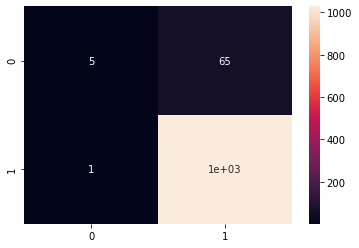

In [11]:
centralAirTestPredict = dectree.predict(salePriceTest)

print('Classification Accuracy \t:' , dectree.score(salePriceTest , centralAirTest) )

sb.heatmap(confusion_matrix(centralAirTest, centralAirTestPredict), 
           annot = True)